## Pymaceuticals Analysis
.The average Infubinal group tumor growth was similar to that of the placebo group, but the average increase metastatic sites was lower over the course of treatment and overall. This group still experienced average growth in metastatic sites higher than Capomulin. The Infubinal group, however, experienced the lowest surival rates of the two other treatments and the placebo.
.Ketapril seems to have a positive affect on tumor volume with the tumors seeing slightly greater average growth over the 45 day time span than the placebo group. The Ketapril group saw an average growth of about 5.7% higher than the placebo group. This may or may not be statistically significant. The Ketapril group saw a slower average increase in metastatic sites than the Placebo group during the course of the 45 days, but overall the number of metatastic sites were about the same. Ketapril's surival rates are comparable to the placebo at the end of the 45 day treatment.
.Treatment includes Capomulin exhibits slower decrease in survival rate, slower spread metastatic sites and decrease in tumor size,

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
import os
from scipy import stats
from math import trunc
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data and create dataframe
clinical_data_df = pd.read_csv(clinical_trial_data_to_load )
mouse_data_df = pd.read_csv(mouse_drug_data_to_load )

#Find if there is duplicate mice 
drop_mouse_id = clinical_data_df.loc[clinical_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

#Drop the duplicate mice from the clinical_trial_data.csv and mouse_drug_data.csv files. 

clean_clinical_df = clinical_data_df[clinical_data_df['Mouse ID'].isin(drop_mouse_id)==False]
clean_mouse_df = mouse_data_df[mouse_data_df['Mouse ID'].isin(drop_mouse_id)==False]

# Combine the two DataFrames together based on 'Mouse ID'.
all_data = pd.merge(clean_clinical_df, clean_mouse_df, on="Mouse ID")

#keep only the data we want to analyze & Display the data table for preview
Analyzed_df = all_data.loc[(all_data["Drug"]=='Capomulin')|
                         (all_data["Drug"]=='Infubinol')|
                           (all_data["Drug"]=='Ketapril')|
                           (all_data["Drug"]=='Placebo')
                          ]

Analyzed_df.head ()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [2]:
# Sort based on Timepoint
data_by_time = Analyzed_df.sort_values("Timepoint", ascending=True)
data_by_time.head()
all_data_by_time = data_by_time.reset_index()
del all_data_by_time['index']
all_data_by_time.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,k483,0,45.0,0,Infubinol
2,i477,0,45.0,0,Placebo
3,o302,0,45.0,0,Placebo
4,g288,0,45.0,0,Capomulin


## Tumor Response to Treatment

In [3]:
#Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_data = all_data_by_time.drop('Metastatic Sites', axis=1)
tumor_volume_data.head()

# Convert to DataFrame
Treatment_df = tumor_volume_data.pivot_table(tumor_volume_data,index=['Drug','Timepoint'], aggfunc='mean')
# Preview DataFrame
Treatment_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
Ketapril  0                   45.000000
          5                   47.389175
          10                  49.582269
          15                  52.399974
          20                  54.920935
          25                  57.678982
          30                  60.994507
          35                  63.371686
          40                  66.068580
          45                  70.662958
Placebo   0                   45.000000
          5                   47.125589
          10                  49.423329
          15                  51.359742
          20                  54.364417
          25                  57.482574
          30                  59.809063
          35                  62.420615
          40                  65.052675
          45                  68.084082

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem = tumor_volume_data.pivot_table(tumor_volume_data, index=['Drug','Timepoint'], aggfunc='sem')
sem.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [5]:
# Minor Data Munging to Re-Format the Data Frames
tumor_vol = Treatment_df
tumor_vol['Tumor Volume Change (mm3)'] = tumor_vol.groupby('Drug')['Tumor Volume (mm3)'].diff()
tumor_vol.head()
#Drop the tumor volume column
tumor_vol_change = tumor_vol.drop('Tumor Volume (mm3)', axis=1)
tumor_vol_change
#Fill in the NaN values with '0'.
tumor_vol_change.fillna(0, inplace=True)
tumor_vol_change.head()
#Pivot the df so 'Timepoint' is the index 
tumor_vol_chart = Analyzed_df.pivot_table('Tumor Volume (mm3)', ['Timepoint'],'Drug' )
tumor_vol_chart.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


In [6]:
#Pivot the sem df so 'Timepoint' is the index 
sem_chart = sem.pivot_table('Tumor Volume (mm3)', ['Timepoint'],'Drug' )
sem_chart.head()
#Fill in the NaN values with '0'.
tumor_vol_change.fillna(0, inplace=True)
tumor_vol_change.head()

Tumor Volume Change (mm3)
Drug      Timepoint                           
Capomulin 0                           0.000000
          5                          -0.733914
          10                         -1.181796
          15                         -1.019973
          20                         -1.347992

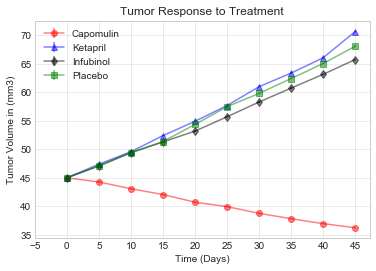

In [7]:
# Generate the Plot (with Error Bars)
# Set the x_axis, colors, makers, and xlim for the line graphs with drugs in the legend.
x_axis = np.arange(0, 50, 5)
drugs = Analyzed_df["Drug"].unique()
count = np.arange(0,len(drugs))
colors = ['red','blue','black','green']
markers = ['o','^','d','s']

plt.style.use('seaborn-whitegrid')
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume in (mm3)")
plt.grid(alpha = 0.5)
for i in count:
    standard_errors = stats.sem(sem_chart[drugs[i]])
    plt.errorbar(x_axis, tumor_vol_chart[drugs[i]], yerr = standard_errors, marker= markers[i], color= colors[i], alpha = 0.5, label = drugs[i])
plt.legend()
plt.xticks(np.arange(min(x_axis)-5, max(x_axis)+5, 5.0))
# Save the Figure
plt.savefig("../Image/Tumor Response.png")
plt.show() 


## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
#Drop the tumor volume
metastatic_df = all_data_by_time.drop('Tumor Volume (mm3)', axis=1)
metastatic_df.head()
#Pivot the table to make 'Drug' the index and get average number of metastatic sites over time.
metastatic_avg = metastatic_df.pivot_table(metastatic_df, index=['Drug','Timepoint'], aggfunc='mean')
metastatic_avg.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
#Pivot the df so 'Timepoint' is the index 
metastatic_sites_chart = metastatic_avg.pivot_table('Metastatic Sites', ['Timepoint'],'Drug')
metastatic_sites_chart
# store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_sem = metastatic_df.pivot_table(metastatic_df, index=['Drug','Timepoint'], aggfunc='sem')
metastatic_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
#Pivot the df so 'Timepoint' is the index 
metastatic_sem_chart = metastatic_sem.pivot_table('Metastatic Sites', ['Timepoint'],'Drug' )
metastatic_sem_chart

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


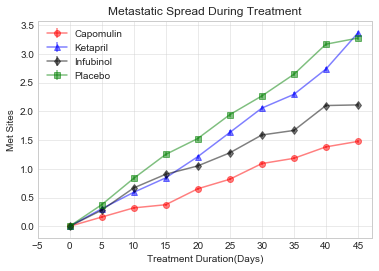

In [11]:
# Generate the Plot (with Error Bars)
# Set the x_axis, colors, makers, and xlim for the line graphs with drugs in the legend.
x_axis = np.arange(0, 50, 5)
drugs = Analyzed_df["Drug"].unique()
count = np.arange(0,len(drugs))
colors = ['red','blue','black','green']
markers = ['o','^','d','s']   
plt.style.use('seaborn-whitegrid')
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration(Days)")
plt.ylabel("Met Sites")
plt.grid(alpha = 0.5)
for i in count:
    chart_data = stats.sem(metastatic_sem_chart[drugs[i]])
    plt.errorbar(x_axis, metastatic_sites_chart[drugs[i]], yerr = chart_data, marker= markers[i], color= colors[i], alpha = 0.5, label = drugs[i])
plt.legend()
plt.xticks(np.arange(min(x_axis)-5, max(x_axis)+5, 5.0))
plt.savefig("../Image/MetasticSpread.png")
plt.show() 
# Show the Figure



## Survival Rates

In [12]:
#Drop the metastatic sites and tumor volume
mouse_surviving = metastatic_df.drop('Metastatic Sites', axis=1)
#mouse_surviving.to_csv('survival.csv', encoding='utf-8', index=False)
mouse_surviving.head()

,Mouse ID,Timepoint,Drug
0,b128,0,Capomulin
1,k483,0,Infubinol
2,i477,0,Placebo
3,o302,0,Placebo
4,g288,0,Capomulin


In [13]:
#Pivot the table to make 'Drug' the index and get the avg number of metastatic sites over time.
mouse_survival = mouse_surviving.pivot_table(mouse_surviving, index=['Drug','Timepoint'], aggfunc='count')
mouse_survival.head()
#Change the name of "Mouse ID" to "Mouse Count"
mouse_survival_df = mouse_survival.rename(columns={"Mouse ID": "Mouse Count"})
mouse_survival_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [14]:
#Pivot the df so 'Timepoint' is the index 
mouse_survival_chart = mouse_survival_df.pivot_table('Mouse Count', ['Timepoint'],'Drug' )
mouse_survival_chart.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


In [15]:
#Present the data in terms of "Survival Rate (%)".
percent_surviving = (1-(mouse_survival_chart.iloc[0]- mouse_survival_chart)/mouse_survival_chart.iloc[0])*100
percent_surviving.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0


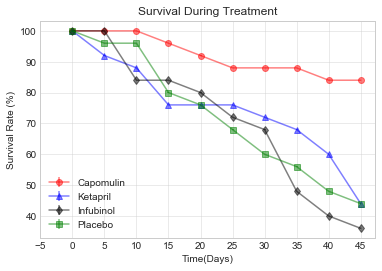

In [16]:
# Set the x_axis, colors, makers, and xlim for the line graphs with drugs in the legend.
x_axis = np.arange(0, 50, 5)
colors = ['red','blue','black','green']  
markers = ['o','^','d','s']  
#plt.xlim(0,50)
drugs = Analyzed_df["Drug"].unique()
count = np.arange(0,len(drugs))
plt.style.use('seaborn-whitegrid')
plt.title("Survival During Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate (%)")
plt.grid(alpha = 0.5)
for i in count:
    plt.errorbar(x_axis, percent_surviving[drugs[i]], yerr = chart_data, marker= markers[i], color= colors[i], alpha = 0.5, label = drugs[i])
plt.legend()
plt.xticks(np.arange(min(x_axis)-5, max(x_axis)+5, 5.0))
plt.savefig("../Image/SpreadRate.png")
plt.show()

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
# Get the first and last rows of the tumor volume chart
short_tumor_vol_chart = tumor_vol_chart.iloc[[0,-1]]
short_tumor_vol_chart
# Get % tumur volume change
percent_tumor_vol_diff = ((short_tumor_vol_chart -short_tumor_vol_chart.iloc[0])/short_tumor_vol_chart.iloc[0])*100
percent_tumor_vol_diff
# Get the last row.
percent_diff = percent_tumor_vol_diff.loc[1:]
#Display the data to confirm
percent_diff.sum()

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

In [18]:
# Store all Relevant Percent Changes into a Tuple
TumorChangePercent = (((tumor_vol_chart.iloc[-1]-tumor_vol_chart.iloc[0])/tumor_vol_chart.iloc[0])*100).to_frame("Percent Change")
TumorChangePercent

,Percent Change
Drug,
Capomulin,-19.475303
Infubinol,46.123472
Ketapril,57.028795
Placebo,51.297960


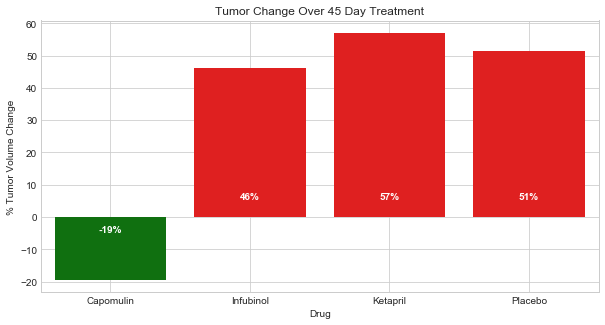

In [19]:
x=TumorChangePercent.index
y=TumorChangePercent['Percent Change']
plt.figure(figsize=(10,5))
colors = ['red' if _y >=0 else 'green' for _y in y]
ax = sn.barplot(x, y, palette=colors)
for n, (label, _y) in enumerate(zip(x, y)):
    if _y <= 0:
        ax.annotate(
            s='{:d}%'.format(trunc(_y)), xy=(n, -10), ha='center',va='center',
            xytext=(0,20), color='w', textcoords='offset points', weight='bold')
    else:
        ax.annotate(
            s='{:d}%'.format(trunc(_y)), xy=(n, 0), ha='center',va='center',
            xytext=(0,20), color='w', textcoords='offset points', weight='bold')  
plt.gca().set(ylabel='% Tumor Volume Change', title='Tumor Change Over 45 Day Treatment')
#plt.rc('grid',color='black', linewidth=0.5)
plt.grid(True)
plt.savefig("../Image/SummaryBar.png")
plt.show()